# Case Study

Done by: Erokhin Evgenii, Davydov Danil

Group: DS-01

Date: 12.03.2024

Email: d.davydov@innopolis.university,  e.erokhin@innopolis.university

Dataset: https://www.kaggle.com/datasets/kishan9044/mobile-legends-professional-players

---



# 1. Prepare and explore the data through preprocessing and analysis.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Load Data Frames
ml_players_data = pd.read_csv('ML_players.csv')
player_details_data = pd.read_csv('Player_details.csv')

In [ ]:
# Explore first dataset
ml_players_data.head()

,Unnamed: 0,Players,Name,Team
0,0,Wizzking,Mohd Zulkarnain Hj Mohd Zulkifli,NaN
1,1,ATEV,Ly Kimhong,Logic Esports
2,2,ATM,Kosal Piseth,Burn x Team Flash
3,3,Arishem,Kunn Chankakada,Burn x Team Flash
4,4,BOXI,Sok Viera,See You Soon


In [ ]:
# Drop unnecessary column
ml_players_data= ml_players_data.drop('Unnamed: 0',axis=1)

In [ ]:
# Explore second dataset
player_details_data.head()

,Unnamed: 0,Nationality,Birth_date,Status,Laner,Earnings
0,0,Brunei,"April 11, 1997 (age 25)",Inactive,Gold Laner,"$70,849"
1,1,Cambodia,NaN,Active,Roamer,"$6,399"
2,2,Cambodia,NaN,Active,EXP Laner,"$8,473"
3,3,Cambodia,NaN,Active,NaN,"$8,933"
4,4,Cambodia,NaN,Active,Roamer,"$12,475"


In [ ]:
# Drop unnecessary column
player_details_data = player_details_data.drop('Unnamed: 0', axis=1)

In [ ]:
# Print shape of dataframes to understand how can we merge
print(ml_players_data.shape, player_details_data.shape)

(429, 3) (429, 5)


In [ ]:
# Combine the dataframes and exclude the "coach" category as
# we focus on analyzing professional players in Mobile Legends: Bang Bang (MLBB).
players = pd.concat([ml_players_data,player_details_data],axis=1)
print(players.shape)
players = players.drop(players[players['Laner'] == 'Coach'].index, axis=0).reset_index(drop=True)
print(players.shape)
nonBreakSpace = u'\xa0'
cols = ['Players',	'Name',	'Team',	'Nationality',	'Birth_date',	'Status',	'Laner']
for col in cols:
  players[col] = players[col].str.replace(nonBreakSpace, ' ')
players.head()

(429, 8)
(428, 8)


,Players,Name,Team,Nationality,Birth_date,Status,Laner,Earnings
0,Wizzking,Mohd Zulkarnain Hj Mohd Zulkifli,NaN,Brunei,"April 11, 1997 (age 25)",Inactive,Gold Laner,"$70,849"
1,ATEV,Ly Kimhong,Logic Esports,Cambodia,NaN,Active,Roamer,"$6,399"
2,ATM,Kosal Piseth,Burn x Team Flash,Cambodia,NaN,Active,EXP Laner,"$8,473"
3,Arishem,Kunn Chankakada,Burn x Team Flash,Cambodia,NaN,Active,NaN,"$8,933"
4,BOXI,Sok Viera,See You Soon,Cambodia,NaN,Active,Roamer,"$12,475"


In [ ]:
# Describe data frame which we obtain
players.describe()

,Players,Name,Team,Nationality,Birth_date,Status,Laner,Earnings
count,428,426,319,428,224,426,405,424
unique,426,426,65,12,217,4,20,385
top,Kid,Mohd Zulkarnain Hj Mohd Zulkifli,RSG Philippines,Indonesia,"April 30, 2004 (age 18)",Active,Roamer,"$1,343"
freq,2,1,12,152,2,349,90,4


Analyze the "nationality" column to identify the different nationalities represented in the dataset and determine the count of players belonging to each nationality. Make a visualization.

In [ ]:
nationality_count = players['Nationality'].value_counts()
print(nationality_count)

Indonesia            152
Philippines          108
Malaysia              69
Singapore             42
Cambodia              28
Myanmar               15
Laos                   5
Vietnam                5
Brunei                 1
Philippines China      1
Philippines Japan      1
Singapore Japan        1
Name: Nationality, dtype: int64


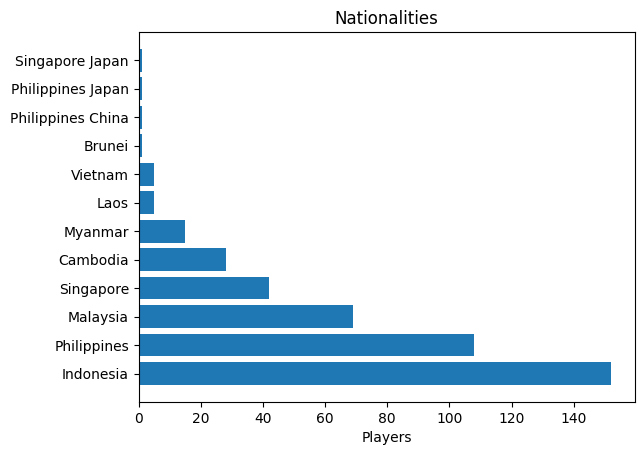

In [ ]:
keys = nationality_count.keys()
plt.barh(keys,nationality_count)
plt.xlabel('Players')
plt.title('Nationalities')
plt.show()

Examine the "laner" column to discover the various positions listed in the dataset and calculate the number of players assigned to each role. Create a visualization to illustrate this distribution.

In [ ]:
laner_counts = players['Laner'].value_counts()
main_lanes = laner_counts[:5]
main_lanes['2+ lanes'] = laner_counts[5:].sum()
print(main_lanes)

Roamer        90
Mid Laner     74
EXP Laner     73
Jungler       62
Gold Laner    59
2+ lanes      47
Name: Laner, dtype: int64


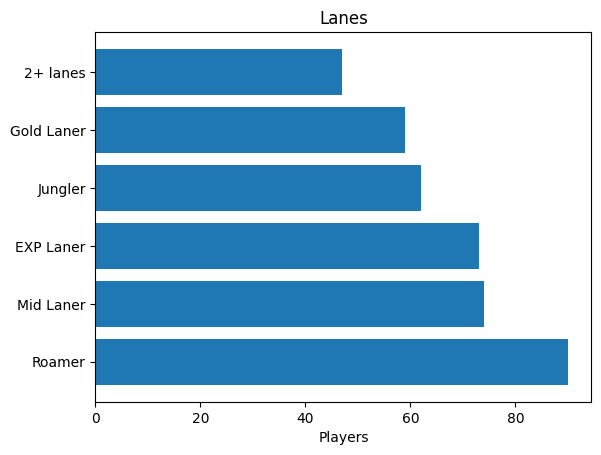

In [ ]:
lane_keys = main_lanes.keys()
plt.barh(lane_keys,main_lanes)
plt.xlabel('Players')
plt.title('Lanes')
plt.show()

Analyze the "status" column to identify the different player statuses present in the dataset and calculate the number of players corresponding to each status. Generate a visualization to visually represent this distribution.

In [ ]:
status_count = players['Status'].value_counts()
print(status_count)

Active      349
Retired      52
Inactive     24
Retried       1
Name: Status, dtype: int64


In [ ]:
players.loc[players['Status'] == 'Retried', 'Status'] = 'Retired'

In [ ]:
status_count = players['Status'].value_counts()
print(status_count)

Active      349
Retired      53
Inactive     24
Name: Status, dtype: int64


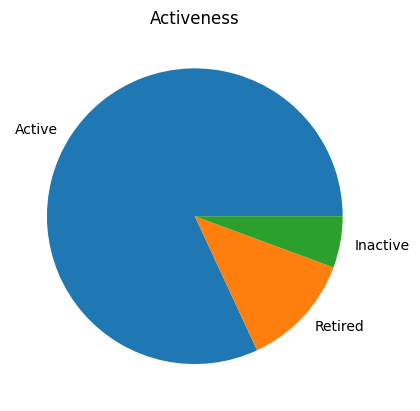

In [ ]:
plt.pie(status_count, labels=status_count.keys())
plt.title('Activeness')
plt.show()

# 2. Investigating the relationship between player earnings and their roles
Following the data exploration phase, we move on to addressing the study's questions. Our initial focus is on determining whether player earnings are influenced by their game positions.

In [ ]:
# The earnings in our dataset are represented with "$" symbols,
# therefore, to perform calculations, we need to remove the symbols and transform the data accordingly.
players['Earnings']=players['Earnings'].astype(str)
for i in range(len(players['Earnings'])):
  players.loc[i,'Earnings'] = players['Earnings'][i].replace('$','')
  players.loc[i,'Earnings'] = players['Earnings'][i].replace(',','')
players['Earnings']=players['Earnings'].astype(float)
print(players.head())

    Players                              Name               Team Nationality  \
0  Wizzking  Mohd Zulkarnain Hj Mohd Zulkifli                NaN      Brunei   
1      ATEV                        Ly Kimhong      Logic Esports    Cambodia   
2       ATM                      Kosal Piseth  Burn x Team Flash    Cambodia   
3   Arishem                   Kunn Chankakada  Burn x Team Flash    Cambodia   
4      BOXI                         Sok Viera       See You Soon    Cambodia   

                Birth_date    Status       Laner  Earnings  
0  April 11, 1997 (age 25)  Inactive  Gold Laner   70849.0  
1                      NaN    Active      Roamer    6399.0  
2                      NaN    Active   EXP Laner    8473.0  
3                      NaN    Active         NaN    8933.0  
4                      NaN    Active      Roamer   12475.0  


In [ ]:
players['Earnings'].describe()

count       424.000000
mean      19790.438679
std       25886.689452
min          74.000000
25%        4727.750000
50%        9805.000000
75%       23593.500000
max      157505.000000
Name: Earnings, dtype: float64

In [ ]:
# In our dataset, there are players who hold multiple roles (such as gold laner and jungler).
# These players have been combined into a new group labeled as "2 plus lanes."
laner_earnings = players[(players['Earnings'].notnull()) & (players['Laner'].notnull())].reset_index(drop=True)
main_laners = ['Gold Laner', 'EXP Laner', 'Roamer', 'Jungler', 'Mid Laner']
laner_earnings.loc[~laner_earnings['Laner'].isin(main_laners), 'Laner'] = '2plus_lanes'
laner_earnings.head()

,Players,Name,Team,Nationality,Birth_date,Status,Laner,Earnings
0,Wizzking,Mohd Zulkarnain Hj Mohd Zulkifli,NaN,Brunei,"April 11, 1997 (age 25)",Inactive,Gold Laner,70849.0
1,ATEV,Ly Kimhong,Logic Esports,Cambodia,NaN,Active,Roamer,6399.0
2,ATM,Kosal Piseth,Burn x Team Flash,Cambodia,NaN,Active,EXP Laner,8473.0
3,BOXI,Sok Viera,See You Soon,Cambodia,NaN,Active,Roamer,12475.0
4,Boom,Ly Kimlong,Impunity KH,Cambodia,"June 16, 2001 (age 21)",Active,EXP Laner,10989.0


Conduct the Kruskal-Wallis H-test algorithm:

Null Hypothesis (H0): The medians are equal, indicating no dependency.

Alternative Hypothesis (H1): The medians are not equal, suggesting a dependency.

In [ ]:
from scipy.stats import kruskal
groups = [group['Earnings'] for name, group in laner_earnings.groupby('Laner')]
print(kruskal(*groups))
statistic, p_value = kruskal(*groups)
if p_value < 0.05:
    print("There is a significant relationship between Lane and Earnings.")
else:
    print("There is no significant relationship between Lane and Earnings.")
for name, group in laner_earnings.groupby('Laner'):
  print(name, group['Earnings'].mean())

KruskalResult(statistic=12.631058400813776, pvalue=0.027092692805994557)
There is a significant relationship between Lane and Earnings.
2plus_lanes 34129.1914893617
EXP Laner 19767.583333333332
Gold Laner 19480.93220338983
Jungler 15170.064516129032
Mid Laner 21113.743243243243
Roamer 17078.112359550563


We have determined a statistically significant relationship between player lane and earnings, as the p-value is well below the chosen significance level, leading us to reject the null hypothesis.

MultiIndex([(  'Mid Laner',),
            (     'Roamer',),
            ('2plus_lanes',),
            (  'EXP Laner',),
            ( 'Gold Laner',),
            (    'Jungler',)],
           )


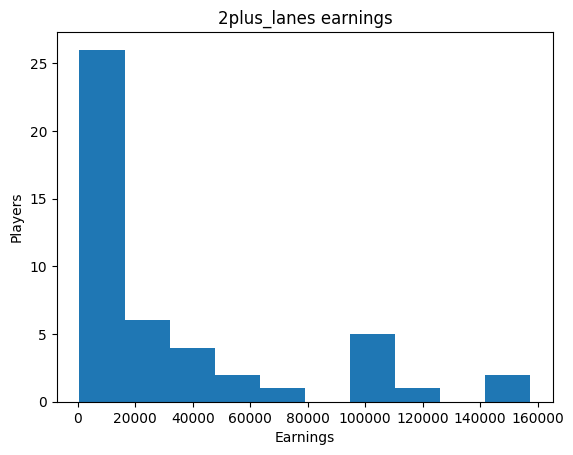

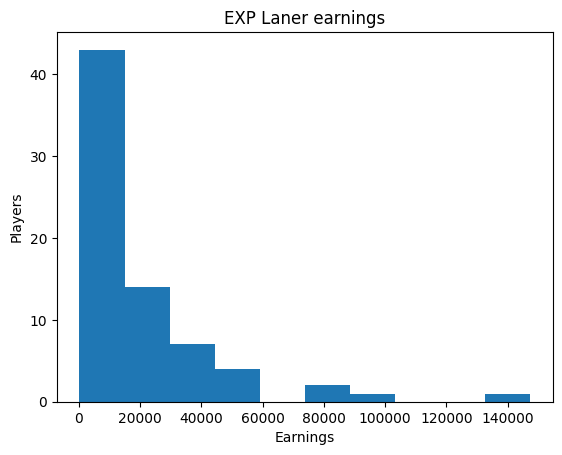

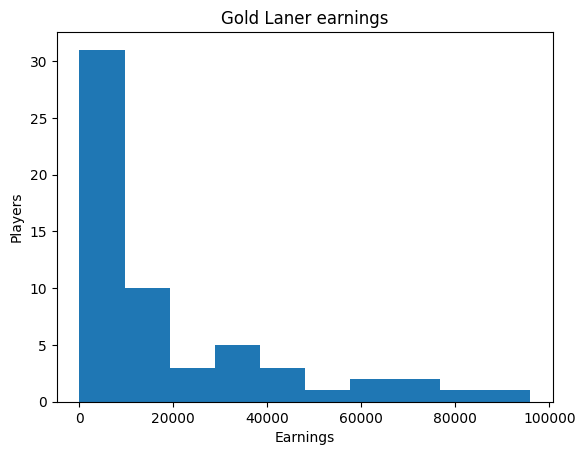

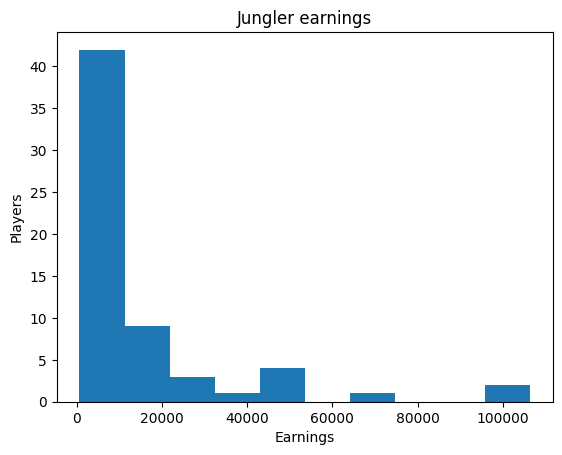

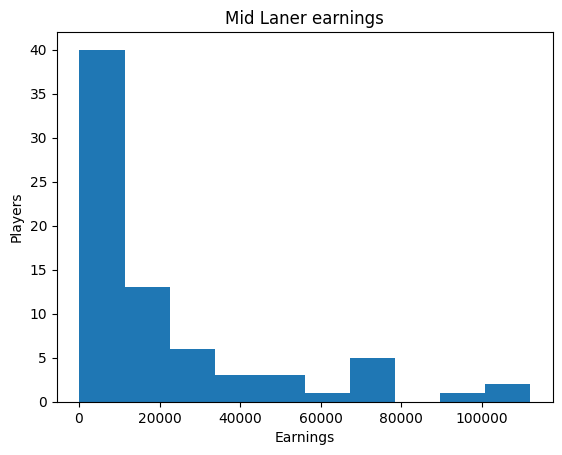

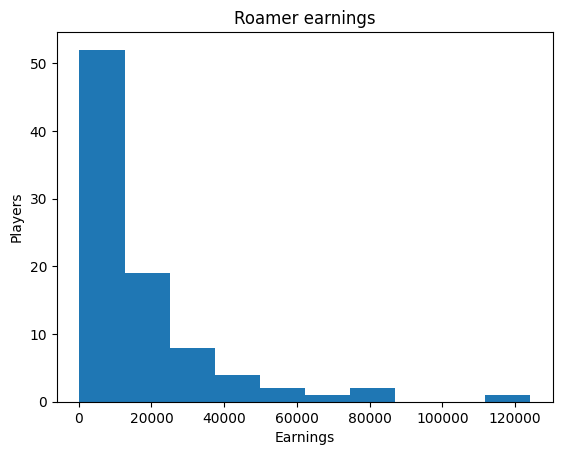

In [ ]:
df = pd.DataFrame(columns=[list(set(laner_earnings['Laner'].values))])
print(df.columns)
for name, group in laner_earnings.groupby('Laner'):
  plt.hist(group['Earnings'])
  plt.xlabel('Earnings')
  plt.ylabel('Players')
  plt.title(f'{name} earnings')
  plt.show()



We have ploted the graps and see that it is not normal distribution, so that we apply nonparametric Kruskal-Wallis test

# 3. Exploring the correlation between the nationalities of players within a team and the team's status as a top-ranking or non-top-ranking team.
The following inquiry aims to ascertain whether there is a relationship between the nationalities of team members and the success level of the team.

In [ ]:
# Given the numerous regions to align, we divided them into five subregions according to geographical locations.
# Following this, we selected teams with four or more members, determined the earnings for each team,
# classified them as either top or non-top teams based on their earnings, and created a contingency table to
# examine the association between a team's classification as top or non-top and their earnings.
subregions = {
    'Indonesia': 'Indonesian archipelago',
    'Philippines': 'Philippines_reg',
    'Malaysia': 'Malay Peninsula',
    'Singapore': 'Malay Peninsula',
    'Cambodia': 'Cambodia and Vietnam',
    'Myanmar': 'Myanmar and Laos',
    'Laos': 'Myanmar and Laos',
    'Vietnam': 'Cambodia and Vietnam',
    'Brunei': 'Malay Peninsula',
    'Philippines China': 'Philippines_reg',
    'Philippines Japan': 'Philippines_reg',
    "Singapore Japan": 'Malay Peninsula'
}

team_nationality_earnings = players.loc[(players['Nationality'].notnull())&(players['Earnings'].notnull())&(players['Team'].notnull()), ['Nationality', 'Earnings', 'Team']].reset_index(drop=True)
team_nationality_earnings['Nationality'] = team_nationality_earnings['Nationality'].astype(str)
team_nationality_earnings['Nationality'] = team_nationality_earnings['Nationality'].replace(subregions)
teams_earnings_tuples = []
for name, group in team_nationality_earnings.groupby('Team'):
  if group.shape[0] > 3:
    tot_earning = group['Earnings'].sum()
    teams_earnings_tuples.append((tot_earning, name))


teams_earnings_tuples.sort()
top, not_top = teams_earnings_tuples[-20:], teams_earnings_tuples[:-20]
for tot_earnings, name in top:
  team_nationality_earnings.loc[team_nationality_earnings['Team'] == name,'IsTop'] = 'IsInTop'


team_nationality_earnings.loc[team_nationality_earnings['IsTop'] != 'IsInTop', 'IsTop'] = 'NotIsInTop'

print(team_nationality_earnings['Nationality'].unique())
contingency_table = pd.crosstab(index=team_nationality_earnings['IsTop'], columns=team_nationality_earnings['Nationality'])
contingency_table


['Cambodia and Vietnam' 'Indonesian archipelago' 'Myanmar and Laos'
 'Malay Peninsula' 'Philippines_reg']


Nationality,Cambodia and Vietnam,Indonesian archipelago,Malay Peninsula,Myanmar and Laos,Philippines_reg
IsTop,,,,,
IsInTop,0,64,28,4,64
NotIsInTop,25,46,48,13,24


To conduct a Chi-square test of independence for the variables in a contingency table:

Null Hypothesis (H0): There is no dependency between team equality and the nationality of players.

Alternative Hypothesis (H1): There is a significant dependency between team equality and the nationality of players.

In [ ]:
from scipy.stats import chi2_contingency
print(chi2_contingency(contingency_table))

Chi2ContingencyResult(statistic=56.113494699315126, pvalue=1.8982632636193304e-11, dof=4, expected_freq=array([[12.65822785, 55.69620253, 38.48101266,  8.60759494, 44.55696203],
       [12.34177215, 54.30379747, 37.51898734,  8.39240506, 43.44303797]]))


The statistical analysis yielded a p-value of 1.8982632636193304e-11, significantly lower than the chosen significance level. Therefore, we reject the null hypothesis and conclude that there is a dependency between team equality and the nationality of players. Additionally, as the expected frequency values are greater than five, the results obtained can be considered valid and reliable.

# 4. Investigating the relationship between player status and their nationality and age.

In [ ]:
# In new dataframe add a new column for player age and classify
# them as Junior or Senior based on their age. Create a contingency table to examine
# the relationship between player status, age category, nationality.
players.head()
players['Birth_date'].value_counts()
nationality_age_ret = players.loc[(players['Nationality'].notnull())&(players['Birth_date'].notnull())&(players['Status'].notnull()), ['Nationality', 'Birth_date', 'Status']].reset_index(drop=True)
nationality_age_ret['Nationality'] = nationality_age_ret['Nationality'].astype(str)
nationality_age_ret['Nationality'] = nationality_age_ret['Nationality'].replace(subregions)
nationality_age_ret.head(100)
nationality_age_ret=nationality_age_ret.loc[nationality_age_ret['Birth_date'].str.contains('age')].reset_index(drop=True)
nationality_age_ret['age'] = nationality_age_ret['Birth_date'].str.slice(-3,-1)
nationality_age_ret.loc[nationality_age_ret['age'].astype(int)<=21,'age_category']='Junior'
nationality_age_ret.loc[nationality_age_ret['age'].astype(int)>21,'age_category']='Senior'
nationality_age_ret.head()
contingency_table_status = pd.crosstab(index=[nationality_age_ret['age_category'],nationality_age_ret['Nationality']], columns=nationality_age_ret['Status'])
print(contingency_table_status)
print(nationality_age_ret['Status'].value_counts())
print(nationality_age_ret['age_category'].value_counts())
print(nationality_age_ret['Nationality'].value_counts())

Status                               Active  Inactive  Retired
age_category Nationality                                      
Junior       Cambodia and Vietnam         1         0        0
             Indonesian archipelago      46         0        0
             Malay Peninsula             10         0        0
             Philippines_reg             55         2        0
Senior       Indonesian archipelago      35         5       10
             Malay Peninsula             13         1        4
             Myanmar and Laos             4         0        0
             Philippines_reg             30         6        0
Active      194
Inactive     14
Retired      14
Name: Status, dtype: int64
Junior    114
Senior    108
Name: age_category, dtype: int64
Indonesian archipelago    96
Philippines_reg           93
Malay Peninsula           28
Myanmar and Laos           4
Cambodia and Vietnam       1
Name: Nationality, dtype: int64


To conduct a Chi-square test of independence for the variables in a contingency table:

Null Hypothesis (H0): There is no dependency between player status and their nationality and age.

Alternative Hypothesis (H1): There is dependency between player status and their nationality and age.

In [ ]:
print(chi2_contingency(contingency_table_status))

Chi2ContingencyResult(statistic=47.51120068211766, pvalue=1.5833055130862314e-05, dof=14, expected_freq=array([[ 0.87387387,  0.06306306,  0.06306306],
       [40.1981982 ,  2.9009009 ,  2.9009009 ],
       [ 8.73873874,  0.63063063,  0.63063063],
       [49.81081081,  3.59459459,  3.59459459],
       [43.69369369,  3.15315315,  3.15315315],
       [15.72972973,  1.13513514,  1.13513514],
       [ 3.4954955 ,  0.25225225,  0.25225225],
       [31.45945946,  2.27027027,  2.27027027]]))


The statistical analysis reveals that many of the expected frequencies obtained are below five, indicating that the test results may not be reliable. This is because the Chi-square test of independence may not be valid when the expected frequencies are too low. Further investigation or alternative methods may be necessary to draw meaningful conclusions from the data.

---



Let's consider combining or merging certain features in the dataset to potentially increase the reliability of the results. By uniting specific variables or attributes, we may be able to enhance the statistical analysis and draw more dependable conclusions from the data.

In [ ]:
# Consolidate our subregions into two regions based on geographical location and redefine the categories
# as active and inactive, with retired players classified as inactive instead of having a separate category.
bijection = {
    'Indonesian archipelago': 'Indonesia region',
    'Philippines_reg': 'Philippines region',
    'Malay Peninsula': 'Indonesia region',
    'Myanmar and Laos': 'Philippines region',
    'Cambodia and Vietnam': 'Philippines region'
}

nationality_age_ret['Nationality'] = nationality_age_ret['Nationality'].replace(bijection)
nationality_age_ret.loc[nationality_age_ret['Status'] != 'Active', 'Status'] = 'Inactive'
nationality_age_ret.head()


,Nationality,Birth_date,Status,age,age_category
0,Indonesia region,"April 11, 1997 (age 25)",Inactive,25,Senior
1,Philippines region,"June 16, 2001 (age 21)",Active,21,Junior
2,Indonesia region,"October 10, 2004 (age 18)",Active,18,Junior
3,Indonesia region,"August 26, 1998 (age 24)",Active,24,Senior
4,Indonesia region,"January 8, 2004 (age 18)",Active,18,Junior


In [ ]:
# Create a new contingency table based on the merged regions and updated player
# categories (active and inactive), then display the statistical analysis results from the test.
contingency_table_status = pd.crosstab(index=nationality_age_ret['Status'], columns=[nationality_age_ret['age_category'],nationality_age_ret['Nationality']])
print(chi2_contingency(contingency_table_status))
contingency_table_status

Chi2ContingencyResult(statistic=30.12009920925356, pvalue=1.3020652099960615e-06, dof=3, expected_freq=array([[48.93693694, 50.68468468, 59.42342342, 34.95495495],
       [ 7.06306306,  7.31531532,  8.57657658,  5.04504505]]))


age_category           Junior                              Senior  \
Nationality  Indonesia region Philippines region Indonesia region   
Status                                                              
Active                     56                 56               48   
Inactive                    0                  2               20   

age_category                     
Nationality  Philippines region  
Status                           
Active                       34  
Inactive                      6

The analysis shows that the expected frequencies are above 5, indicating that the results are valid. The p-value obtained is 1.3020652099960615e-06, which is lower than the chosen significance level (0.05). Therefore, we reject the null hypothesis and conclude that there is a dependency between player status and their nationality and age.
